In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("weather.csv")

In [3]:
df.head()

,Humidity,Temperature,Soil,Rainfall,RainTomorrow
0,71,22,0,1,No
1,44,22,0,0,No
2,38,25,0,0,No
3,45,28,0,0,No
4,82,32,0,1,No


In [4]:
df.describe()

,Humidity,Temperature,Soil,Rainfall
count,999.000000,999.000000,999.000000,999.000000
mean,73.606607,21.834835,0.464464,0.338338
std,17.532518,7.949222,0.498985,0.473381
min,20.000000,8.000000,0.000000,0.000000
25%,60.000000,15.000000,0.000000,0.000000
50%,76.000000,21.000000,0.000000,0.000000
75%,87.000000,29.000000,1.000000,1.000000
max,100.000000,44.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Humidity      999 non-null    int64 
 1   Temperature   999 non-null    int64 
 2   Soil          999 non-null    int64 
 3   Rainfall      999 non-null    int64 
 4   RainTomorrow  999 non-null    object
dtypes: int64(4), object(1)
memory usage: 39.1+ KB


In [6]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

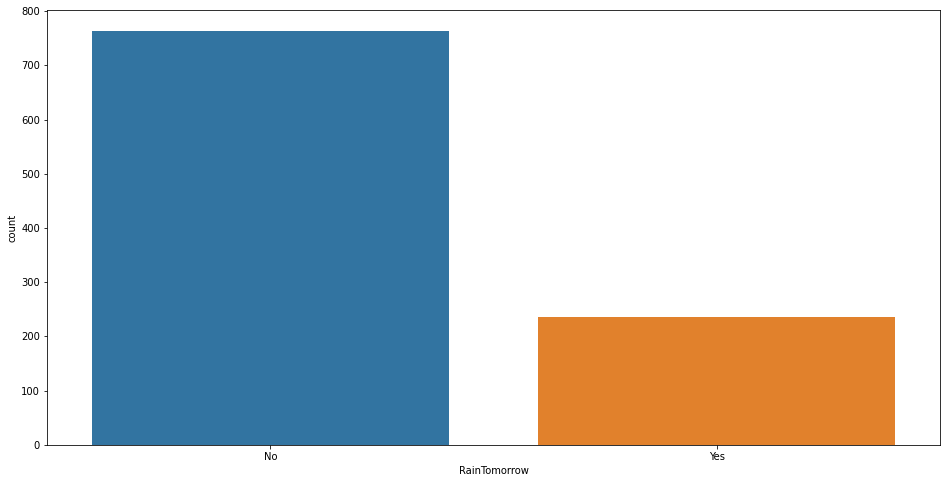

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='RainTomorrow', data = df)

In [8]:
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
x_train

,Humidity,Temperature,Soil,Rainfall
335,66,34,1,0
13,65,21,1,1
871,85,20,1,0
156,82,19,1,0
428,61,34,0,1
...,...,...,...,...
767,51,30,1,0
72,45,29,1,0
908,99,16,1,0
235,87,12,0,0


In [11]:
X_train[0]

array([-0.27480478,  0.02711538,  1.03642847,  1.42336714])

In [12]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#classifier = DecisionTreeClassifier(criterion = 'gini', random_state=42)
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[199  32]
 [ 45  24]]


0.7433333333333333

In [15]:
from sklearn.preprocessing import LabelEncoder
encode_rainy = LabelEncoder()
df['RainTomorrow']=encode_rainy.fit_transform(df['RainTomorrow'])
#creating the dataframe
Rain = pd.DataFrame(zip(encode_rainy.classes_,encode_rainy.transform(encode_rainy.classes_)),columns=['original','Encoded'])
Rain = Rain.set_index('original')
Rain

,Encoded
original,
No,0
Yes,1


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['RainTomorrow']),df['RainTomorrow'],test_size=0.1,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (899, 4), y_train = (899,), x_test = (100, 4), y_test = (100,)


In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 335 to 37
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Humidity     899 non-null    int64
 1   Temperature  899 non-null    int64
 2   Soil         899 non-null    int64
 3   Rainfall     899 non-null    int64
dtypes: int64(4)
memory usage: 35.1 KB


In [18]:
#rand = DecisionTreeClassifier(random_state = 42)
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [19]:
pred_rand = rand.predict(x_test)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.78      0.99      0.87        72
           1       0.89      0.29      0.43        28

    accuracy                           0.79       100
   macro avg       0.83      0.64      0.65       100
weighted avg       0.81      0.79      0.75       100

Best score :  0.7730843552582684
Best params :  {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 300}


In [21]:
import pickle
pickle_out = open('classifier.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [22]:
model = pickle.load(open('classifier.pkl', 'rb'))
ans = model.predict([[88,11,1,1]])
if ans[0] == 0:
    print("Sunny weather")
else:
    print("Rainy weather")

Rainy weather
